In [1]:
from datascience import *
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## At least one success

check [this](https://docs.microsoft.com/en-us/learn/modules/introduction-probability/01-introduction) link.

Data scientists often work with random samples from populations. A question that sometimes arises is about the likelihood that a particular individual in the population is selected to be in the sample. To work out the chance, that individual is called a "success," and the problem is to find the chance that the sample contains a success.

To see how such chances might be calculated, we start with a simpler setting: tossing a coin two times.

If you toss a coin twice, there are four equally likely outcomes: HH, HT, TH, and TT. We have abbreviated "Heads" to H and "Tails" to T. The chance of getting at least one head in two tosses is therefore 
3
4
.

Another way of coming up with this answer is to work out what happens if you don't get at least one head: both the tosses have to land tails. So,

P
(
at least one head in two tosses
)
 
=
 
1
−
P
(
both tails
)
 
=
 
1
−
1
4
 
=
 
3
4
Notice also that

P
(
both tails
)
 
=
 
1
4
 
=
 
1
2
⋅
1
2
 
=
 
(
1
2
)
2
by the multiplication rule.

These two observations allow us to find the chance of at least one head in any given number of tosses. For example,

P
(
at least one head in 17 tosses
)
 
=
 
1
−
P
(
all 17 are tails
)
 
=
 
1
−
(
1
2
)
17
And now we are in a position to find the chance that the face with six spots comes up at least once in rolls of a die.

For example,

P
(
a single roll is not 6
)
 
=
 
P
(
1
)
+
P
(
2
)
+
P
(
3
)
+
P
(
4
)
+
P
(
5
)
 
=
 
5
6
Therefore,

P
(
at least one 6 in two rolls
)
 
=
 
1
−
P
(
both rolls are not 6
)
 
=
 
1
−
(
5
6
)
2
and

P
(
at least one 6 in 17 rolls
)
 
=
 
1
−
(
5
6
)
17
The table below shows these probabilities as the number of rolls increases from 1 to 50.

In [3]:
rolls = np.arange(1, 51, 1)
results = Table().with_columns(
    'Rolls', rolls,
    'Chance of at least one 6', 1 - (5/6)**rolls
)
results

Rolls,Chance of at least one 6
1,0.166667
2,0.305556
3,0.421296
4,0.517747
5,0.598122
6,0.665102
7,0.720918
8,0.767432
9,0.806193
10,0.838494


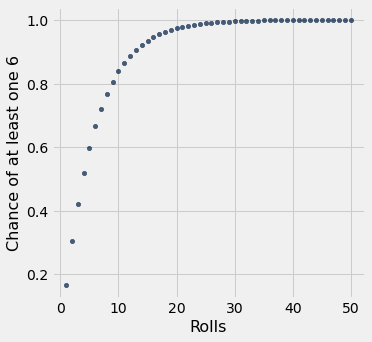

In [4]:
results.scatter('Rolls')

In [5]:
results.where('Rolls', 50)

Rolls,Chance of at least one 6
50,0.99989


## Updating predictions
5 minutes
We know how to use training data to classify a point into one of two categories. Our classification is just a prediction of the class, based on the most common class among the training points that are nearest our new point.

Suppose that we eventually find out the true class of our new point. Then we will know whether we got the classification right. Also, we will have a new point that we can add to our training set, because we know its class. This updates our training set. So, naturally, we will want to update our classifier based on the new training set.

This chapter looks at some simple scenarios where new data leads us to update our predictions. While the examples in the chapter are simple in terms of calculation, the method of updating can be generalized to work in complex settings and is one of the most powerful tools used for machine learning.

## A "more likely than not" binary classifier

Let's try to use data to classify a point into one of two categories, choosing the category that we think is more likely than not. To do this, we not only need the data but also a clear description of how chances are involved.

We will start out in a simple artificial setting just to develop the main technique, and then move to a more intriguing example.

Suppose there is a university class with the following composition:

60% of the students are Second Years and the remaining 40% are Third Years
50% of the Second Years have declared their major
80% of the Third Years have declared their major
Now suppose I pick a student at random from the class. Can you classify the student as Second Year or Third Year, using our "more likely than not" criterion?

You can, because the student is picked at random and so you know that the chance that the student is a Second Year is 60%. That's greater than the 40% chance of being a Third Year, so you would classify the student as Second Year.

The information about the majors is irrelevant, as we already know the proportions of Second and Third Years in the class.

We have a pretty simple classifier! But now suppose I give you some additional information about the student who was picked:

The student has declared a major.

Would this knowledge change your classification?

In [6]:
year = np.array(['Second']*60 + ['Third']*40)
major = np.array(['Undeclared']*30+['Declared']*30+['Undeclared']*8+['Declared']*32)
students = Table().with_columns(
    'Year', year,
    'Major', major
)

In [9]:
students

Year,Major
Second,Undeclared
Second,Undeclared
Second,Undeclared
Second,Undeclared
Second,Undeclared
Second,Undeclared
Second,Undeclared
Second,Undeclared
Second,Undeclared
Second,Undeclared


In [10]:
students.pivot("Major", "Year")

Year,Declared,Undeclared
Second,30,30
Third,32,8


The total count is 100 students, of whom 60 are Second Years and 40 are Third Years. Among the Second Years, 50% are in each of the Major categories. Among the 40 Third Years, 20% are Undeclared and 80% Declared. So this population of 100 students has the same proportions as the class in our problem, and we can assume that our student has been picked at random from among all 100 students.

We have to pick which row the student is most likely to be in. When we knew nothing more about the student, he or she could be in any of the four cells, and therefore were more likely to be in the top row (Second Year) because that contains more students.

But now we know that the student has declared a major, so the space of possible outcomes has decreased: now the student can only be in one of the two Declared cells.

There are 62 students in those cells, and 32 out of the 62 are Third Years. That's more than half, even though not by much.

So, in the light of the new information about the student's major, we have to update our prediction and now classify the student as a Third Year.

What is the chance that our classification is correct? We will be right for all the 32 Third Years who are Declared, and wrong for the 30 Second Years who are Declared. The chance that we are correct is therefore about 0.516.

In other words, the chance that we are correct is the proportion of Third Years among the students who have Declared.

## Bayes' rule

The method that we have used is due to the Reverend Thomas Bayes (1701-1761). His method solved what was called an "inverse probability" problem: given new data, how can you update chances you had found earlier? Though Bayes lived three centuries ago, his method is widely used now in machine learning.

We will state the rule in the context of our population of students. First, some terminology:

Prior probabilities. Before we knew the chosen student's major declaration status, the chance that the student was a Second Year was 60% and the chance that the student was a Third Year was 40%. These are the prior probabilities of the two categories.

Likelihoods. These are the chances of the Major status, given the category of student; thus they can be read off the tree diagram. For example, the likelihood of Declared status given that the student is a Second Year is 0.5.

Posterior probabilities. These are the chances of the two Year categories, after we have taken into account information about the Major declaration status. We computed one of these:

The posterior probability that the student is a Third Year, given that the student has Declared, is denoted 
P
(
Third Year
 
∣
∣
 
D
e
c
l
a
r
e
d
)
 and is calculated as follows.

P
(
T
h
i
r
d
Y
e
a
r
 
∣
∣
 
D
e
c
l
a
r
e
d
)
 
=
 
0.4
×
0.8
0.6
×
0.5
 
+
 
0.4
×
0.8
 
 
=
 
(prior probability of Third Year)
×
(likelihood of Declared given Third Year)
total probability of Declared
The other posterior probability is

P
(
Second Year
 
∣
∣
 
Declared
)
 
=
 
0.6
×
0.5
0.6
×
0.5
 
+
 
0.4
×
0.8
 
 
=
 
(prior probability of Second Year)
×
(likelihood of Declared given Second Year)
total probability of Declared


## Making decisions
5 minutes
A primary use of Bayes' Rule is to make decisions based on incomplete information, incorporating new information as it comes in. This section points out the importance of keeping your assumptions in mind as you make decisions.

Many medical tests for diseases return Positive or Negative results. A Positive result means that according to the test, the patient has the disease. A Negative result means the test concludes that the patient doesn't have the disease.

Medical tests are carefully designed to be very accurate. But few tests are accurate 100% of the time. Almost all tests make errors of two kinds:

A false positive is an error in which the test concludes Positive but the patient doesn't have the disease.

A false negative is an error in which the test concludes Negative but the patient does have the disease.

These errors can affect people's decisions. False positives can cause anxiety and unnecessary treatment (which in some cases is expensive or dangerous). False negatives can have even more serious consequences if the patient doesn't receive treatment because of their Negative test result.



A test for a rare disease
Suppose there is a large population and a disease that strikes a tiny proportion of the population. The tree diagram below summarizes information about such a disease and about a medical test for it.

Tree rare disease.

Overall, only 4 in 1000 of the population has the disease. The test is quite accurate: it has a very small false positive rate of 5 in 1000, and a somewhat larger (though still small) false negative rate of 1 in 100.

Individuals might or might not know whether they have the disease; typically, people get tested to find out whether they have it.

So suppose a person is picked at random from the population and tested. If the test result is Positive, how would you classify them: Disease, or No disease?

We can answer this by applying Bayes' Rule and using our "more likely than not" classifier. Given that the person has tested Positive, the chance that he or she has the disease is the proportion in the top branch, relative to the total proportion in the Test Positive branches.


Given that the person has tested Positive, the chance that he or she has the disease is about 44%. So we will classify them as: No disease.

This is a strange conclusion. We have a pretty accurate test, and a person who has tested Positive, and our classification is ... that they don't have the disease? That doesn't seem to make any sense.

When faced with a disturbing answer, the first thing to do is to check the calculations. The arithmetic above is correct. Let's see if we can get the same answer in a different way.

The function population returns a table of outcomes for 100,000 patients, with columns that show the True Condition and Test Result. The test is the same as the one described in the tree. But the proportion who have the disease is an argument to the function.

We will call population with 0.004 as the argument, and then pivot to cross-classify each of the 100,000 people.